## EDA y Transformacion de datos
En este notebook se tomaran los archivos json que se encuentran en la carpeta Fuente_json que contienen informacion sobre usdcoin y se les realizaran las transformaciones necesarias y el analisis respectivo, luego de esto los dataframes resultantes se exportaran a archivos .xlsx los cualses quedan almacenados el la carpera Datos_Procesados en la subcarpeta respectiva.

Creacion de dataframe a partir del archivo fuente .json

In [7]:
import json
import pandas as pd

# Cargar el JSON desde el archivo
with open('../Data/Fuente_json/usdcoin/coin_id_usdcoin.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Crear un nuevo diccionario para almacenar los datos no anidados
flat_data = {
    'id': data['id'],
    'symbol': data['symbol'],
    'name': data['name'],
    'block_time_in_minutes': data['block_time_in_minutes'],
    'hashing_algorithm': data['hashing_algorithm'],
    'description': data['description']['en'],
    'homepage': ', '.join(data['links']['homepage']),
    'reddit_subscribers': data['community_data']['reddit_subscribers'],
    'twitter_followers': data['community_data']['twitter_followers'],
    'github_repos': ', '.join(data['links']['repos_url']['github']),
    'last_updated': data['last_updated']
}

# Crear un DataFrame a partir de los datos no anidados
coin_id_usdcoin1 = pd.DataFrame([flat_data])

# Imprimir el DataFrame
print(coin_id_usdcoin1)

         id symbol      name  block_time_in_minutes hashing_algorithm  \
0  usd-coin   usdc  USD Coin                      0              None   

                                         description  \
0  USDC is a fully collateralized US dollar stabl...   

                                            homepage  reddit_subscribers  \
0  https://www.circle.com/en/usdc, https://www.ce...                   0   

   twitter_followers                               github_repos  \
0             150631  https://github.com/centrehq/centre-tokens   

               last_updated  
0  2023-08-14T05:33:02.281Z  


hay columnas que no aportan valor para la clase de analisis que se va a realizar por lo que se eliminan estas columnas.

In [8]:
#Eliminar columnas
coin_id_usdcoin1.drop(['homepage',"github_repos","last_updated","description"] , axis=1, inplace=True)

In [9]:
print(coin_id_usdcoin1)

         id symbol      name  block_time_in_minutes hashing_algorithm  \
0  usd-coin   usdc  USD Coin                      0              None   

   reddit_subscribers  twitter_followers  
0                   0             150631  


## grafico
para las categorias de block_time_in_minutes','reddit_subscribers','twitter_followers'

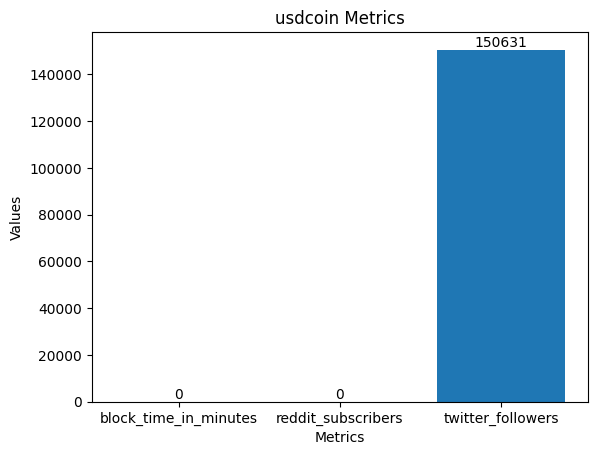

In [10]:
import matplotlib.pyplot as plt

# Datos del DataFrame
data = {
    'block_time_in_minutes': coin_id_usdcoin1['block_time_in_minutes'][0],
    'reddit_subscribers': coin_id_usdcoin1['reddit_subscribers'][0],
    'twitter_followers': coin_id_usdcoin1['twitter_followers'][0]
}

# Crear una figura y ejes
fig, ax = plt.subplots()

# Crear el gráfico de barras
bars = ax.bar(data.keys(), data.values())

# Agregar etiquetas de datos en las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Configurar el título y etiquetas de los ejes
ax.set_title('usdcoin Metrics')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')

# Mostrar el gráfico
plt.show()

exportacion del dataframe a archivo .xlsx

In [11]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_usdcoin1.to_excel("..\Data\Datos_Procesados/usdcoin\coin_id_usdcoin1.xlsx", sheet_name="coin_id_usdcoin1.xlsx", index=False, float_format="%.2f")

Creacion de dataframe a partir del archivo fuente .json

In [12]:
# Cargar el JSON desde el archivo
with open('..\Data\Fuente_json/usdcoin\coin_id_usdcoin.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Función para aplanar diccionarios anidados
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

# Aplanar los datos anidados del JSON
flattened_data = flatten_dict(data)

# Crear un DataFrame a partir de los datos aplanados
coin_id_usdcoin2 = pd.DataFrame([flattened_data])

# Imprimir el DataFrame
print(coin_id_usdcoin2)

         id symbol      name asset_platform_id  \
0  usd-coin   usdc  USD Coin          ethereum   

                           platforms_ethereum  \
0  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   

                              platforms_oasys  \
0  0xe1ab220e37ac55a4e2dd5ba148298a9c09fbd716   

                               platforms_xdai  \
0  0xddafbb505ad214d7b80b1f830fccc89b60fb7a83   

                             platforms_rollux  \
0  0x368433cac2a0b8d76e64681a9835502a1f2a8a30   

                        platforms_thundercore  \
0  0x22e89898a04eaf43379beb70bf4e38b1faf8a31e   

                             platforms_mantle  ...  \
0  0x09bc4e0d864854c6afb6eb9a9cdf58ac190d0df9  ...   

  developer_data_pull_requests_merged  \
0                                 253   

  developer_data_pull_request_contributors  \
0                                       16   

  developer_data_code_additions_deletions_4_weeks_additions  \
0                                                  0    

In [13]:
coin_id_usdcoin2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 213 entries, id to last_updated
dtypes: float64(5), int64(69), object(139)
memory usage: 1.8+ KB


Valores faltantes

In [14]:
missing_values = coin_id_usdcoin2.isnull().sum()
print(missing_values)

id                                                    0
symbol                                                0
name                                                  0
asset_platform_id                                     0
platforms_ethereum                                    0
                                                     ..
developer_data_last_4_weeks_commit_activity_series    0
public_interest_stats_alexa_rank                      0
public_interest_stats_bing_matches                    1
status_updates                                        0
last_updated                                          0
Length: 213, dtype: int64


Exportar dataframe a archivo .xlsx

In [15]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_usdcoin2.to_excel("..\Data\Datos_Procesados/usdcoin\coin_id_usdcoin2.xlsx", sheet_name="coin_id_usdcoin2.xlsx", index=False, float_format="%.2f")

Creacion de dataframe a partir de archivo fuente .json

In [16]:
with open('..\Data\Fuente_json/usdcoin\coin_id_market_chart_usdcoin.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
coin_id_market_chart_usdcoin= pd.DataFrame(data)

# Imprimir el DataFrame
print(coin_id_market_chart_usdcoin)


                     prices                          market_caps  \
0     [1538697600000, 1.01]                   [1538697600000, 0]   
1        [1538784000000, 1]                   [1538784000000, 0]   
2        [1538870400000, 1]                   [1538870400000, 0]   
3        [1538956800000, 1]                   [1538956800000, 0]   
4        [1539043200000, 1]                   [1539043200000, 0]   
...                     ...                                  ...   
1771     [1691712000000, 1]   [1691712000000, 26152601233.99182]   
1772     [1691798400000, 1]   [1691798400000, 26116498500.47991]   
1773     [1691884800000, 1]  [1691884800000, 26161944529.388718]   
1774     [1691971200000, 1]  [1691971200000, 26180583371.681644]   
1775     [1691994065000, 1]   [1691994065000, 26186483383.51626]   

                            total_volumes  
0     [1538697600000, 31264.420429900205]  
1      [1538784000000, 20254.71225490974]  
2      [1538870400000, 49324.69066914409]  
3      

tratamiento de columnas como listas

In [17]:
# Descomponer las listas en columnas separadas
coin_id_market_chart_usdcoin['timestamp'] = coin_id_market_chart_usdcoin['prices'].apply(lambda x: x[0])
coin_id_market_chart_usdcoin['price'] = coin_id_market_chart_usdcoin['prices'].apply(lambda x: x[1])
coin_id_market_chart_usdcoin['market_cap'] = coin_id_market_chart_usdcoin['market_caps'].apply(lambda x: x[1])
coin_id_market_chart_usdcoin['volume'] = coin_id_market_chart_usdcoin['total_volumes'].apply(lambda x: x[1])

# Convertir los valores a tipos de datos adecuados
coin_id_market_chart_usdcoin['timestamp'] = pd.to_datetime(coin_id_market_chart_usdcoin['timestamp'], unit='ms')
coin_id_market_chart_usdcoin['price'] = pd.to_numeric(coin_id_market_chart_usdcoin['price'])
coin_id_market_chart_usdcoin['market_cap'] = pd.to_numeric(coin_id_market_chart_usdcoin['market_cap'])
coin_id_market_chart_usdcoin['volume'] = pd.to_numeric(coin_id_market_chart_usdcoin['volume'])

# Eliminar las columnas originales de listas
coin_id_market_chart_usdcoin.drop(['prices', 'market_caps', 'total_volumes'], axis=1, inplace=True)

# Mostrar el DataFrame modificado
print(coin_id_market_chart_usdcoin)

               timestamp  price    market_cap        volume
0    2018-10-05 00:00:00   1.01  0.000000e+00  3.126442e+04
1    2018-10-06 00:00:00   1.00  0.000000e+00  2.025471e+04
2    2018-10-07 00:00:00   1.00  0.000000e+00  4.932469e+04
3    2018-10-08 00:00:00   1.00  0.000000e+00  4.707673e+04
4    2018-10-09 00:00:00   1.00  0.000000e+00  5.554222e+04
...                  ...    ...           ...           ...
1771 2023-08-11 00:00:00   1.00  2.615260e+10  2.203564e+09
1772 2023-08-12 00:00:00   1.00  2.611650e+10  1.575234e+09
1773 2023-08-13 00:00:00   1.00  2.616194e+10  1.242418e+09
1774 2023-08-14 00:00:00   1.00  2.618058e+10  1.681827e+09
1775 2023-08-14 06:21:05   1.00  2.618648e+10  1.718192e+09

[1776 rows x 4 columns]


transformacion de datos

In [18]:
# Convertir la columna 'timestamp' a tipo datetime
coin_id_market_chart_usdcoin['timestamp'] = pd.to_datetime(coin_id_market_chart_usdcoin['timestamp'])

# Obtener solo la fecha de la columna 'timestamp'
coin_id_market_chart_usdcoin['timestamp'] = coin_id_market_chart_usdcoin['timestamp'].dt.date

In [19]:
coin_id_market_chart_usdcoin

,timestamp,price,market_cap,volume
0,2018-10-05,1.01,0.000000e+00,3.126442e+04
1,2018-10-06,1.00,0.000000e+00,2.025471e+04
2,2018-10-07,1.00,0.000000e+00,4.932469e+04
3,2018-10-08,1.00,0.000000e+00,4.707673e+04
4,2018-10-09,1.00,0.000000e+00,5.554222e+04
...,...,...,...,...
1771,2023-08-11,1.00,2.615260e+10,2.203564e+09
1772,2023-08-12,1.00,2.611650e+10,1.575234e+09
1773,2023-08-13,1.00,2.616194e+10,1.242418e+09
1774,2023-08-14,1.00,2.618058e+10,1.681827e+09


In [20]:
# cambiar nombre columna
coin_id_market_chart_usdcoin.rename(columns={'timestamp': 'date'}, inplace=True)

In [21]:
print(coin_id_market_chart_usdcoin)

            date  price    market_cap        volume
0     2018-10-05   1.01  0.000000e+00  3.126442e+04
1     2018-10-06   1.00  0.000000e+00  2.025471e+04
2     2018-10-07   1.00  0.000000e+00  4.932469e+04
3     2018-10-08   1.00  0.000000e+00  4.707673e+04
4     2018-10-09   1.00  0.000000e+00  5.554222e+04
...          ...    ...           ...           ...
1771  2023-08-11   1.00  2.615260e+10  2.203564e+09
1772  2023-08-12   1.00  2.611650e+10  1.575234e+09
1773  2023-08-13   1.00  2.616194e+10  1.242418e+09
1774  2023-08-14   1.00  2.618058e+10  1.681827e+09
1775  2023-08-14   1.00  2.618648e+10  1.718192e+09

[1776 rows x 4 columns]


In [22]:
coin_id_market_chart_usdcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1776 non-null   object 
 1   price       1776 non-null   float64
 2   market_cap  1776 non-null   float64
 3   volume      1776 non-null   float64
dtypes: float64(3), object(1)
memory usage: 55.6+ KB


## Grafico
para evidenciar outliers

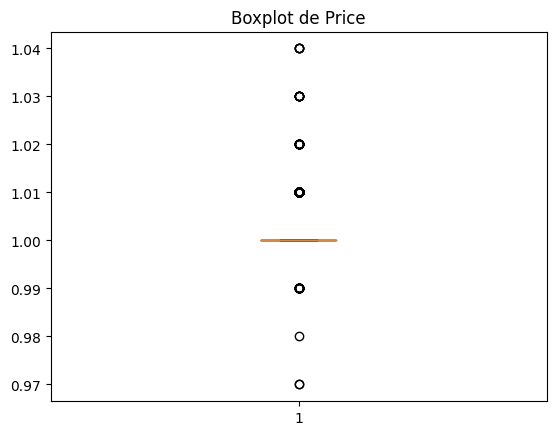

In [23]:
import matplotlib.pyplot as plt
plt.boxplot(coin_id_market_chart_usdcoin['price'])
plt.title('Boxplot de Price')
plt.show()

## Grafico de lineas dobles
para evidenciar como han evolucionado entre si el precio y la capitalizacion del mercado

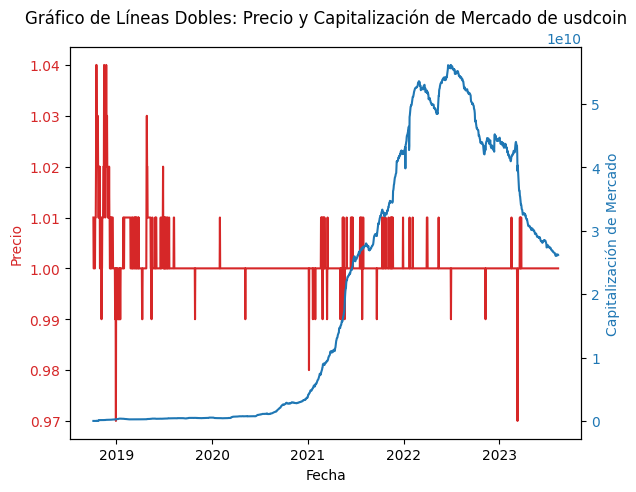

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_usdcoin['date'] = pd.to_datetime(coin_id_market_chart_usdcoin['date'])

# Crear el gráfico de líneas dobles
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio', color=color)
ax1.plot(coin_id_market_chart_usdcoin['date'], coin_id_market_chart_usdcoin['price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Segundo eje y
color = 'tab:blue'
ax2.set_ylabel('Capitalización de Mercado', color=color)
ax2.plot(coin_id_market_chart_usdcoin['date'], coin_id_market_chart_usdcoin['market_cap'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Ajustar el diseño del gráfico
plt.title('Gráfico de Líneas Dobles: Precio y Capitalización de Mercado de usdcoin')
plt.show()

## Gráfico de Retorno Diario
Para calcular los retornos diarios del precio y vizulalizar cómo varían en función de los días.

C:\Users\Gio\AppData\Local\Temp\ipykernel_3840\3645365010.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_6_months['daily_return'] = data_last_6_months['price'].pct_change()


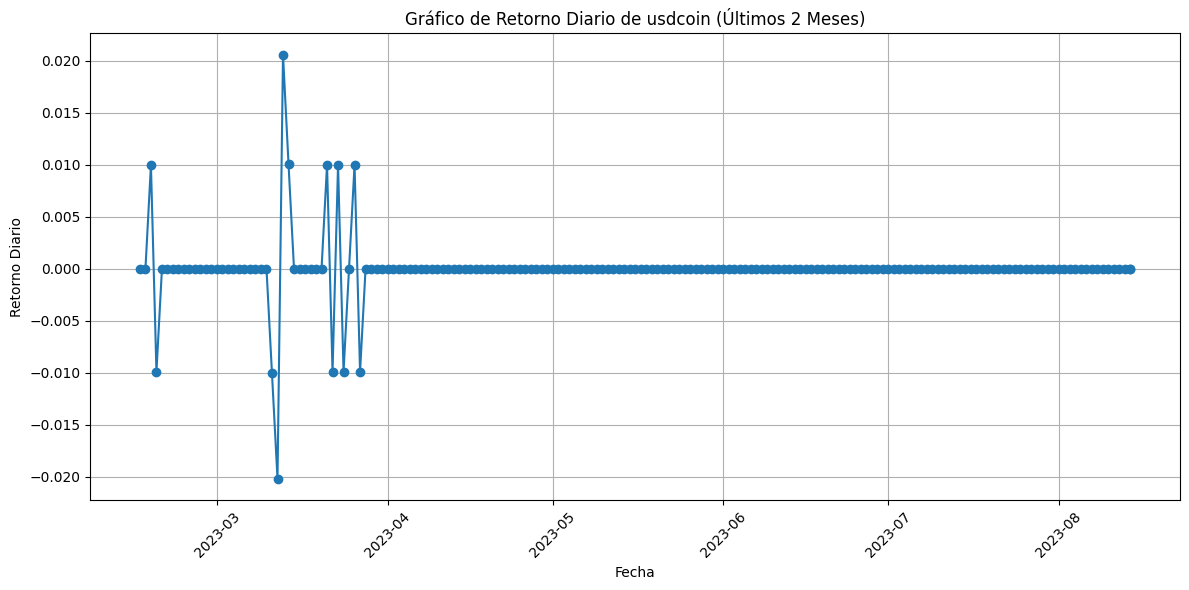

In [37]:
import pandas as pd
import matplotlib.pyplot as plt


# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_usdcoin['date'] = pd.to_datetime(coin_id_market_chart_usdcoin['date'])

# Obtener la fecha actual
current_date = pd.to_datetime('2023-08-14')  # Cambia la fecha a la actual si es necesario

# Calcular la fecha 6 meses antes de la fecha actual
six_months_ago = current_date - pd.DateOffset(months=6)

# Filtrar los datos para los últimos 6 meses
data_last_6_months = coin_id_market_chart_usdcoin[
    (coin_id_market_chart_usdcoin['date'] >= six_months_ago) &
    (coin_id_market_chart_usdcoin['date'] <= current_date)
]

# Calcular los retornos diarios del precio
data_last_6_months['daily_return'] = data_last_6_months['price'].pct_change()

# Crear el gráfico de retorno diario
plt.figure(figsize=(12, 6))
plt.plot(data_last_6_months['date'], data_last_6_months['daily_return'], marker='o')
plt.title('Gráfico de Retorno Diario de usdcoin (Últimos 2 Meses)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Gráfico de Precios y Volumen
Se combinan dos series de datos en un solo gráfico para ver cómo los precios y el volumen de negociación están relacionados.

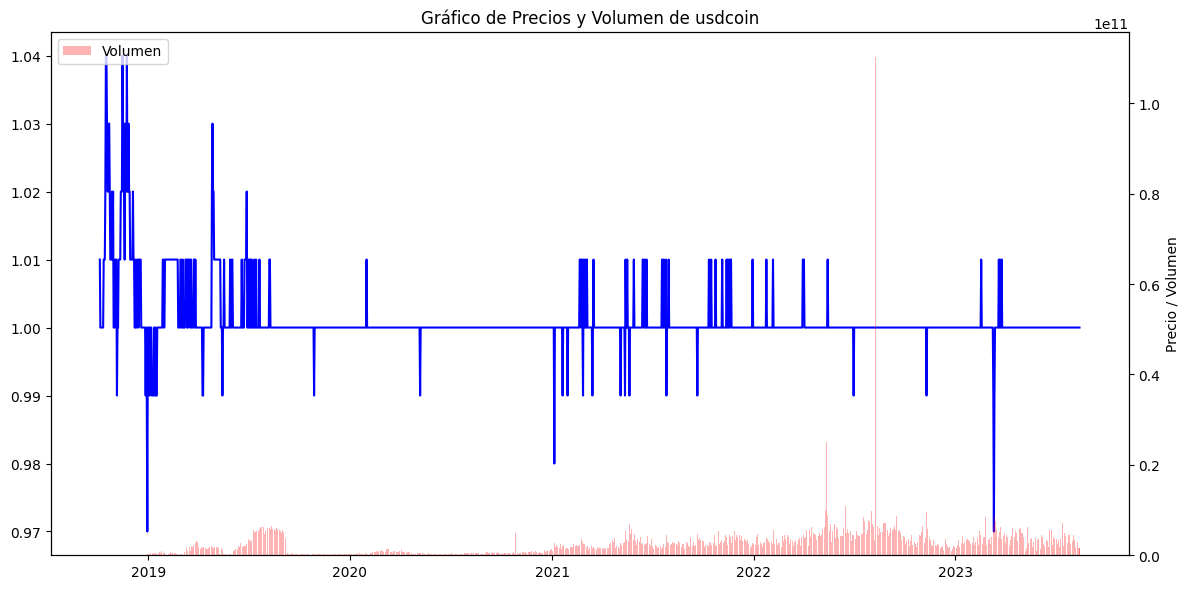

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_usdcoin['date'] = pd.to_datetime(coin_id_market_chart_usdcoin['date'])

# Crear el gráfico de precios y volumen combinados
plt.figure(figsize=(12, 6))

# Gráfico de precios (línea azul)
plt.plot(coin_id_market_chart_usdcoin['date'], coin_id_market_chart_usdcoin['price'], color='blue', label='Precio')

# Crear un segundo eje y para el volumen
plt.gca().twinx()

# Gráfico de volumen (barra roja)
plt.bar(coin_id_market_chart_usdcoin['date'], coin_id_market_chart_usdcoin['volume'], color='red', alpha=0.3, label='Volumen')

plt.title('Gráfico de Precios y Volumen de usdcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio / Volumen')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [27]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_market_chart_usdcoin.to_excel("..\Data\Datos_Procesados/usdcoin\coin_id_market_chart_usdcoin.xlsx", sheet_name="coin_id_market_chart_usdcoin.xlsx", index=False, float_format="%.2f")

d:\Programs Instalds\Python\Program Instald\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [28]:
with open('..\Data\Fuente_json/usdcoin\coin_id_ohlc_usdcoin.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
coin_id_ohlc_usdcoin= pd.DataFrame(data)

# Imprimir el DataFrame
print(coin_id_ohlc_usdcoin)

                 0     1     2     3     4
0    1538870400000  1.01  1.01  1.00  1.00
1    1539216000000  1.00  1.00  1.00  1.00
2    1539561600000  1.01  1.02  1.01  1.02
3    1539907200000  1.04  1.04  1.02  1.02
4    1540252800000  1.02  1.03  1.02  1.02
..             ...   ...   ...   ...   ...
458  1690761600000  1.00  1.00  1.00  1.00
459  1691020800000  1.00  1.00  1.00  1.00
460  1691366400000  1.00  1.00  1.00  1.00
461  1691712000000  1.00  1.00  1.00  1.00
462  1692057600000  1.00  1.00  1.00  1.00

[463 rows x 5 columns]


In [29]:
coin_id_ohlc_usdcoin[0] = pd.to_datetime(coin_id_ohlc_usdcoin[0], unit='ms')

In [30]:
# cambiar nombre columna
coin_id_ohlc_usdcoin.rename(columns={'date': 'Date', 1:'Open', 2:'High', 3:'Low', 4:'Close'}, inplace=True)

In [31]:
coin_id_ohlc_usdcoin

,0,Open,High,Low,Close
0,2018-10-07,1.01,1.01,1.00,1.00
1,2018-10-11,1.00,1.00,1.00,1.00
2,2018-10-15,1.01,1.02,1.01,1.02
3,2018-10-19,1.04,1.04,1.02,1.02
4,2018-10-23,1.02,1.03,1.02,1.02
...,...,...,...,...,...
458,2023-07-31,1.00,1.00,1.00,1.00
459,2023-08-03,1.00,1.00,1.00,1.00
460,2023-08-07,1.00,1.00,1.00,1.00
461,2023-08-11,1.00,1.00,1.00,1.00


In [32]:
coin_id_ohlc_usdcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       463 non-null    datetime64[ns]
 1   Open    463 non-null    float64       
 2   High    463 non-null    float64       
 3   Low     463 non-null    float64       
 4   Close   463 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 18.2 KB


In [33]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_ohlc_usdcoin.to_excel("..\Data\Datos_Procesados/usdcoin\coin_id_ohlc_usdcoin.xlsx", sheet_name="coin_id_ohlc_usdcoin.xlsx", index=False, float_format="%.2f")